In [11]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [23]:
house_price = load_boston()
house_price.data

C:\python38-64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

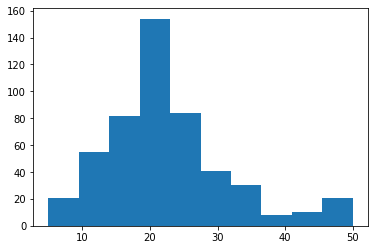

In [13]:
y_target = house_price.target
print(y_target.shape)
plt.hist(y_target, bins=10)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method = 'None', p_degree=None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd



alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2 ), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=house_price.data)
    # print('\n## 변환 유형 : {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    print(f'\n## 변환 유형 : {scale_method[0]}, Polynomial Degree: {scale_method[1]}' )
    
    # def get_linear_reg_eval(esimator, params = None, X_data, y_target, verbose=False):
    #     get_scaled_data(method= scale_methods[0], p_degree=)
    
def get_linear_reg_eval(method="Ridge", params=[], X_data_n=None, y_target_n=None, verbose=False) :
    result_df = pd.DataFrame()
    for param in params :
        ridge = Ridge(alpha=param)
        neg_mse_scores = cross_val_score(ridge, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5, verbose=verbose)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print(f"alpha {param}일 때 5 folds의 개별 평균 RMSE : {avg_rmse:.4f}")
               


## 변환 유형 : None, Polynomial Degree: None

## 변환 유형 : Standard, Polynomial Degree: None

## 변환 유형 : Standard, Polynomial Degree: 2

## 변환 유형 : MinMax, Polynomial Degree: None

## 변환 유형 : MinMax, Polynomial Degree: 2

## 변환 유형 : Log, Polynomial Degree: None


In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd

def get_linear_reg_eval(method="Ridge", params=[], X_data_n=None, y_target_n=None, verbose=True) :
    result_df = pd.DataFrame()
    for param in params :
        ridge = Ridge(alpha=param)
        neg_mse_scores = cross_val_score(ridge, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5, verbose=verbose)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print(f"alpha {param}일 때 5 folds의 개별 평균 RMSE : {avg_rmse:.4f}")

In [38]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ("Standard", None), ("Standard", 2),
                ("MinMax", None), ("MinMax", 2), ("Log", None)]

for scale_method in scale_methods :
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=house_price.data)
    print(f"\n## 변환 유형:{scale_method[0]}, Polynomial Degree:{scale_method[1]}")

    # alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고,
    # 회귀 계수값들을 DataFrame으로 반환해주는 함수
    get_linear_reg_eval("Ridge", params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.7885
alpha 1일 때 5 folds의 개별 평균 RMSE : 5.6526
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.5182
alpha 100일 때 5 folds의 개별 평균 RMSE : 5.3296

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.8260
alpha 1일 때 5 folds의 개별 평균 RMSE : 5.8029
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.6368
alpha 100일 때 5 folds의 개별 평균 RMSE : 5.4214

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 8.8272
alpha 1일 때 5 folds의 개별 평균 RMSE : 6.8713
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.4849
alpha 100일 때 5 folds의 개별 평균 RMSE : 4.6344

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.7636
alpha 1일 때 5 folds의 개별 평균 RMSE : 5.4650
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.7542
alpha 100일 때 5 folds의 개별 평균 RMSE : 7.6349

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds의 개별 평균 RMSE : 5.2976
alpha 1일 때 5 folds의 개별 평균 RMSE : 4.3227
alpha 10일 때 5 folds의 개별 평균 RMSE : 5.1852
alpha 100일 때 5 f